# Geographic Data

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

In this mission, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the <a href="http://openflights.org/data.html">openflights website</a>. Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

- `airlines.csv` - data on each airline.
    - country - where the airline is headquartered.
    - active - if the airline is still active.


- `airports.csv` - data on each airport.
    - name - name of the airport.
    - city - city the airport is located.
    - country - country the airport is located.
    - code - unique airport code.
    - latitude - latitude value.
    - longitude - longitude value.


- `routes.csv` - data on each flight route.
    - airline - airline for the route.
    - source - starting city for the route.
    - dest - destination city for the route.
    
We can explore a range of interesting questions and ideas using these datasets:

- For each airport, which destination airport is the most common?
- Which cities are the most important hubs for airports and airlines?

In [1]:
import numpy as np
import pandas as pd

# Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and route
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
route = pd.read_csv('routes.csv')

# return the first row in each dataframe as a neat table.
airlines_first_row = airlines.iloc[0]
airports_first_row = airports.iloc[0]
route_first_row = route.iloc[0]

# Display the first rows for all dataframes using the print() function
print(airlines_first_row)
print(airports_first_row)
print(route_first_row)

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


## Geographic Coordinate System

A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

![](https://s3.amazonaws.com/dq-content/latitude_longitude.png)

Here are the coordinates of 2 well known points of interest:
<table>
    <thead>
        <tr>
            <td>Name</td>
            <td>City</td>
            <td>State</td>
            <td>Latitude</td>
            <td>Longitude</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>White House</td>
            <td>Washington</td>
            <td>DC</td>
            <td>38.898166</td>
            <td>-77.036441</td>
        </tr>
        <tr>
            <td>Alcatraz Island</td>
            <td>San Francisco</td>
            <td>CA</td>
            <td>37.827122</td>
            <td>-122.422934</td>
        </tr>
</table>

In most cases, we want to visualize latitude and longitude points on two-dimensional maps. Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a **map projection**.

A <a href="https://en.wikipedia.org/wiki/Map_projection">map projection</a> transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs here. We'll use the <a href='https://en.wikipedia.org/wiki/Mercator_projection'>Mercator projection</a>, because it is commonly used by popular mapping software.

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Workflow With Basemap

Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.


Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the <a href="http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap">basemap constructor</a> and pass in values for the required parameters:

- `projection`: the map projection.
- `llcrnrlat`: latitude of lower left hand corner of the desired map domain
- `urcrnrlat`: latitude of upper right hand corner of the desired map domain
- `llcrnrlon`: longitude of lower left hand corner of the desired map domain
- `urcrnrlon`: longitude of upper right hand corner of the desired map domain

In [3]:
"""
Create a new basemap instance with the following parameters:
    projection: "merc"
    llcrnrlat: -80 degrees
    urcrnrlat: 80 degrees
    llcrnrlon: -180 degrees
    urcrnrlon: 180 degrees
"""
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

## Converting From Spherical to Cartesian Coordinates

As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of **longitude** and **latitude** values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use `Series.tolist()` to convert the longitude and latitude columns from the airports dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:
> `x, y = m(longitudes, latitudes)`

The basemap object will return 2 list objects, which we assign to **x** and **y**. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

In [4]:
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()

# Convert the longitude values to x and latitude values to y.
x, y = m(longitudes, latitudes)

## Generating a Scatter Plot 

Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of **x** and **y** coordinates, we use the <a href="">basemap.scatter()</a> method.
> `m.scatter(x,y)`


The `basemap.scatter()` method has similar parameters to the `pyplot.scatter()`. For example, we can customize the size of each marker using the s parameter:
> `m.scatter(x,y,s=10)` # large markers <br/>
> `m.scatter(x,y,s=5)` # small markers <br/>

After we've created the scatter plot, use `plt.show()` to display the plot. We'll dive more into customizing the plot in the next step but now, create a simple scatter plot.

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


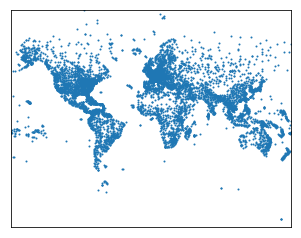

In [5]:
# Create a scatter plot using the converted latitude and longitude values using a marker size of 1.
m.scatter(x,y,s=1)

# display the plot
plt.show()

## Customizing The Plot Using Basemap

You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the `basemap.drawcoastlines()` method.

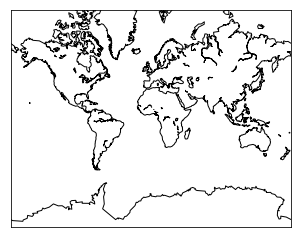

In [6]:
# Use basemap.drawcoastlines() to enable the coast lines to be displayed.
m.drawcoastlines()

# display plot
plt.show()

## Customizing The Plot Using Matplotlib

Because basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map.

We can add code that:

- uses `pyplot.subplots()` to specify the `figsize` parameter
- returns the Figure and Axes object for a single subplot and assigns to `fig` and `ax` respectively
- use the `Axes.set_title()` method to set the map title

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


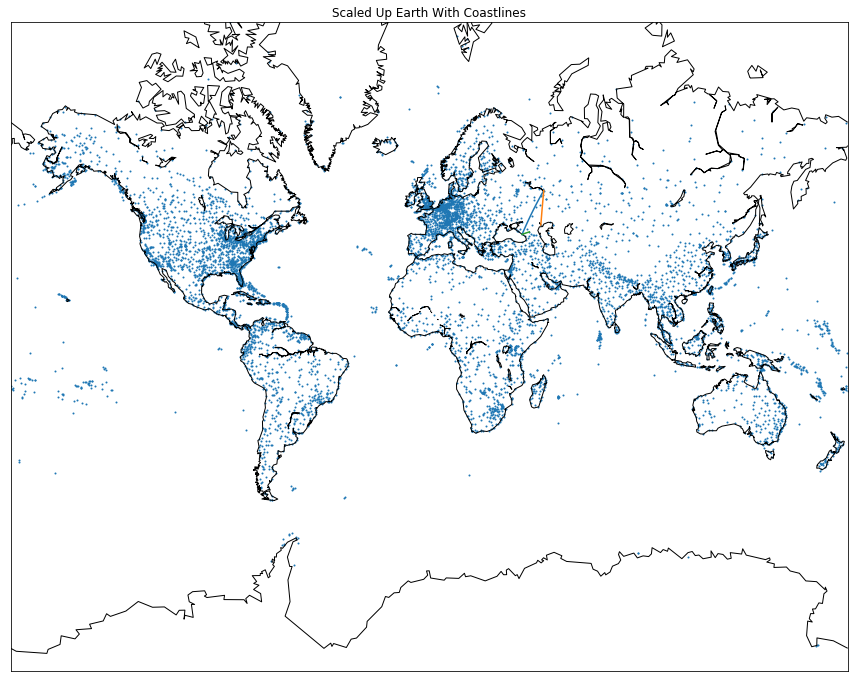

In [55]:
# creates a figure with a height of 15 inches and a width of 20 inches
fig, ax = plt.subplots(figsize=(15,20))

# sets the title of the scatter plot to "Scaled Up Earth With Coastlines"
plt.title("Scaled Up Earth With Coastlines")

# Basemap constructor
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1) 
m.drawcoastlines()
plt.show()

## Introduction to Great Circles

To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

![](https://s3.amazonaws.com/dq-content/great_circles.png)

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight routes from the `routes` dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. 

While the `routes` dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (`airports`).

In [9]:
# Read geo_routes.csv into a dataframe named geo_routes.
geo_routes = pd.read_csv('geo_routes.csv')

# Use the DataFrame.info() method to look for columns containing any null values.
geo_routes.info()

# Display the first five rows in geo_routes
geo_routes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


We use the <a href='http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle'>basemap.drawgreatcircle()</a> method to display a great circle between 2 points. The `basemap.drawgreatcircle()` method requires four parameters in the following order:

- `lon1` - longitude of the starting point.
- `lat1` - latitude of the starting point.
- `lon2` - longitude of the ending point.
- `lat2` - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:
> `m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)` <br/> 
`m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)` <br/>
`m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)` <br/>

In [83]:
"""
 draws a great circle for each route that has an absolute difference 
 in the latitude and longitude values less than 180.
"""
def create_great_circles(df):
    # creates a figure with a height of 15 inches and a width of 20 inches
    fig, ax = plt.subplots(figsize=(15,20))
    
    # Basemap constructor
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
    longitudes = airports["longitude"].tolist()
    latitudes = airports["latitude"].tolist()
    x, y = m(longitudes, latitudes)
    m.scatter(x, y, s=1) 
    m.drawcoastlines()
    
    # Iterate over the rows in the dataframe using DataFrame.iterrows()
    for row in df.iterrows():
        row = row[1]
        # The absolute difference between the latitude values is less than 180
        if (abs((row.end_lat - row.start_lat)) < 180) & (abs((row.end_lon - row.start_lon)) < 180):
            m.drawgreatcircle(row.start_lon, row.start_lat, row.end_lon, row.end_lat)
    pass

In [84]:
# Create a filtered dataframe containing just the routes that start at the DFW airport.
dfw = geo_routes[geo_routes.source=='DFW']
dfw.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
1057,4M,DFW,EZE,777,-97.037997,-58.535833,32.896828,-34.822222
5134,AA,DFW,ABI,ERD CRJ ER4,-97.037997,-99.681897,32.896828,32.411319
5135,AA,DFW,ABQ,M80 M83,-97.037997,-106.609194,32.896828,35.040222
5136,AA,DFW,ACT,ER4 ERD,-97.037997,-97.230519,32.896828,31.611289
5137,AA,DFW,AEX,CRJ ER4 ERD,-97.037997,-92.549833,32.896828,31.327400


In [85]:
# Create a filtered dataframe containing just the routes that start at the DFW airport.
ceb = geo_routes[geo_routes.source=='CEB']
ceb.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
1807,5J,CEB,BCD,320 ATR,123.979439,122.929617,10.307542,10.642511
1808,5J,CEB,BXU,319,123.979439,125.477972,10.307542,8.951322
1809,5J,CEB,CGM,ATR,123.979439,124.707000,10.307542,9.253520
1810,5J,CEB,CGY,ATR 320 319,123.979439,124.611219,10.307542,8.415619
1811,5J,CEB,CRK,319,123.979439,120.560278,10.307542,15.185833


In [109]:
airports.info()
airports[airports.city=='Cebu'].head(20)
dest = ceb.dest

city_country_code = airports[['name','city', 'country', 'code']]

print(city_country_code.columns)

city_code = {}
for row in city_country_code.iterrows():
    city_code[row[1].code] = row[1].city

name_code = {}
for row in city_country_code.iterrows():
    name_code[row[1].code] = row[1].name

for d in dest:
    if d in name_code:
        print(d, name_code[d], city_code[d])
    
airports[airports.code=='BCD']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
id           8107 non-null int64
name         8107 non-null object
city         8107 non-null object
country      8107 non-null object
code         5880 non-null object
icao         8043 non-null object
latitude     8107 non-null float64
longitude    8107 non-null float64
altitude     8107 non-null int64
offset       8107 non-null float64
dst          8107 non-null object
timezone     8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB
Index(['name', 'city', 'country', 'code'], dtype='object')
BCD 2357 Bacolod
BXU 4090 Butuan
CGM 4313 Camiguin
CGY 2338 Ladag
CRK 4030 Angeles City
DGT 2359 Dumaguete
DPL 4091 Dipolog
DVO 3981 Davao
GES 4968 General Santos City
HKG 2996 Hong Kong
ICN 3155 Seoul
ILO 2362 Iloilo
KLO 2363 Kalibo
LGP 4093 Legazpi
MNL 2335 Manila
MPH 3894 Caticlan
OZC 4094 Ozamis
PAG 2339 Pagadian
PPS 2366 Puerto Princesa
PUS 2311 Busan
SI

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
2357,2423,Bacolod,Bacolod,Philippines,BCD,RPVB,10.642511,122.929617,25,8.0,N,Asia/Manila


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


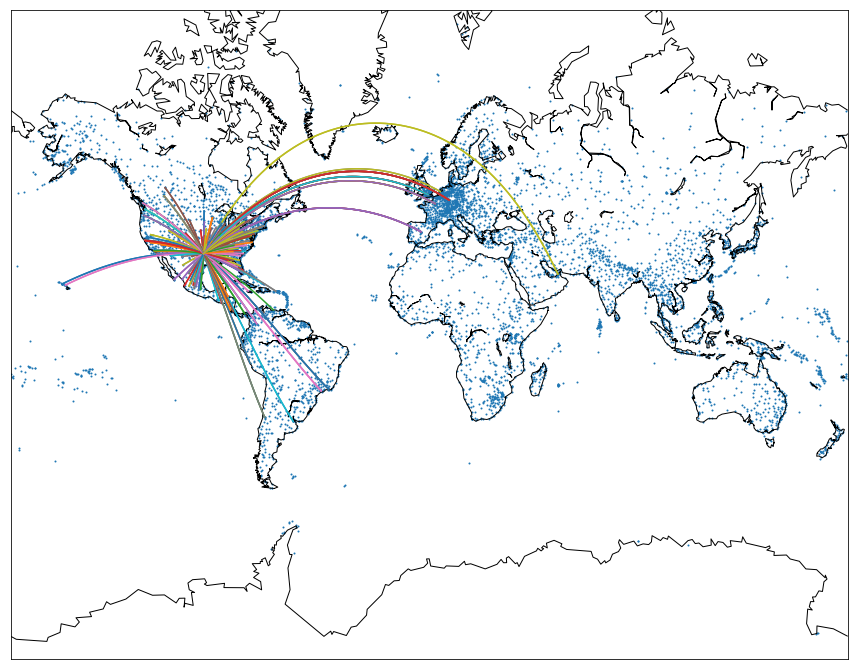

In [112]:
create_great_circles(dfw)
plt.show()